## Loadin the dataset and preparing it

In [371]:
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt

In [372]:
df = pd.read_csv('dataset_facebook-ads-library-scraper_2025-04-26_16-34-01-155.csv')

# Getting only the needed columns
arr = ['ad_archive_id', 'collation_id', 'collation_count', 'start_date', 'end_date', 'snapshot/title', 'snapshot/body/text', 'snapshot/cta_text', 'snapshot/display_format', 'snapshot/images/0/original_image_url', 'snapshot/videos/0/video_hd_url']
df = df[arr]

df.rename(columns={
                    'publisher_platform/0': 'publisher_platform',
                    'snapshot/title': 'title',
                    'snapshot/body/text': 'text',
                    'snapshot/cta_text': 'cta_text',
                    'snapshot/display_format': 'display_format',
                    'snapshot/images/0/original_image_url': 'original_image_url',
                    'snapshot/videos/0/video_hd_url': 'video_hd_url', }, inplace=True)

In [373]:
df = df.copy()

# Finding the duration of days between the duration end_date and start_date
df['duration'] = (df['end_date'] - df['start_date'])

# Transforming timestamp into datetime format
for i in ['start_date', 'end_date']:
    df[i] = df[i].apply(lambda x: datetime.fromtimestamp(x) if isinstance(x, int) else x)


Droping the creatives, that do not meet our requirments or do not bring any insights

In [374]:
# Removing creatives launched the day the data was scrapped, because they didn't have the time to bring any insights
df_performing = df[df['start_date'] < pd.Timestamp('2025-04-26')]

# Creating a new dataframe for best performing “active” creatives
# Best performing - Creatives that had beed used more than once and had been shown for more than a day
df_performing = df_performing[(df_performing['collation_count'] > 1) & (df_performing['duration'] >= 86400)]

In [375]:
# Sorting by the condition: launched multiples times and running for longer period
df_performing_sorted = df_performing.sort_values(by = ['collation_count', 'duration'], ascending=False)

df_performing_sorted = df_performing_sorted.reset_index(drop=True)

In [376]:
df_performing_sorted

,ad_archive_id,collation_id,collation_count,start_date,end_date,title,text,cta_text,display_format,original_image_url,video_hd_url,duration
0,678418197989140,6.963545e+14,3.0,2025-04-09 12:00:00,2025-04-26 12:00:00,Start Now,Kick-start your AI journey with Coursiv 🚀,Learn more,VIDEO,NaN,https://z-p3-video.fdac3-2.fna.fbcdn.net/v/t42...,1468800
1,1047838257200829,6.963545e+14,3.0,2025-04-15 12:00:00,2025-04-26 12:00:00,Start Now,Kick-start your AI journey with Coursiv 🚀,Learn more,VIDEO,NaN,https://video.fhan18-1.fna.fbcdn.net/v/t42.179...,950400
2,682238964349250,1.584666e+15,3.0,2025-04-22 12:00:00,2025-04-25 12:00:00,Start Now,Kick-start your AI journey with Coursiv 🚀,Learn more,VIDEO,NaN,https://video.ftun2-2.fna.fbcdn.net/v/t42.1790...,259200
3,656038293992821,1.584666e+15,3.0,2025-04-24 12:00:00,2025-04-26 12:00:00,Start Now,Kick-start your AI journey with Coursiv 🚀,Learn more,VIDEO,NaN,https://video.fric1-1.fna.fbcdn.net/v/t42.1790...,172800
4,1744339892845482,6.963545e+14,3.0,2025-04-24 12:00:00,2025-04-26 12:00:00,Start Now,Kick-start your AI journey with Coursiv 🚀,Learn more,VIDEO,NaN,https://video.fric1-1.fna.fbcdn.net/v/t42.1790...,172800
5,685339403944458,1.700233e+15,2.0,2025-04-12 12:00:00,2025-04-26 12:00:00,Start Now,Kick-start your AI journey with Coursiv 🚀,Learn more,VIDEO,NaN,https://video.fhan18-1.fna.fbcdn.net/v/t42.179...,1209600
6,700589509062159,5.455605e+14,2.0,2025-04-12 12:00:00,2025-04-26 12:00:00,Start Now,Kick-start your AI journey with Coursiv 🚀,Learn more,VIDEO,NaN,https://video.fhan18-1.fna.fbcdn.net/v/t42.179...,1209600
7,1070728258424000,1.075159e+15,2.0,2025-04-12 12:00:00,2025-04-26 12:00:00,Start Now,Kick-start your AI journey with Coursiv 🚀,Learn more,VIDEO,NaN,https://video.fhan18-1.fna.fbcdn.net/v/t42.179...,1209600
8,1727331888130106,1.045761e+15,2.0,2025-04-12 12:00:00,2025-04-26 12:00:00,Start Now,Kick-start your AI journey with Coursiv 🚀,Learn more,VIDEO,NaN,https://video.fhan18-1.fna.fbcdn.net/v/t42.179...,1209600
9,4026093494299401,1.369079e+15,2.0,2025-04-12 12:00:00,2025-04-26 12:00:00,Start Now,Kick-start your AI journey with Coursiv 🚀,Learn more,VIDEO,NaN,https://video.fhan18-1.fna.fbcdn.net/v/t42.179...,1209600


## Vizualizing:

Display formats

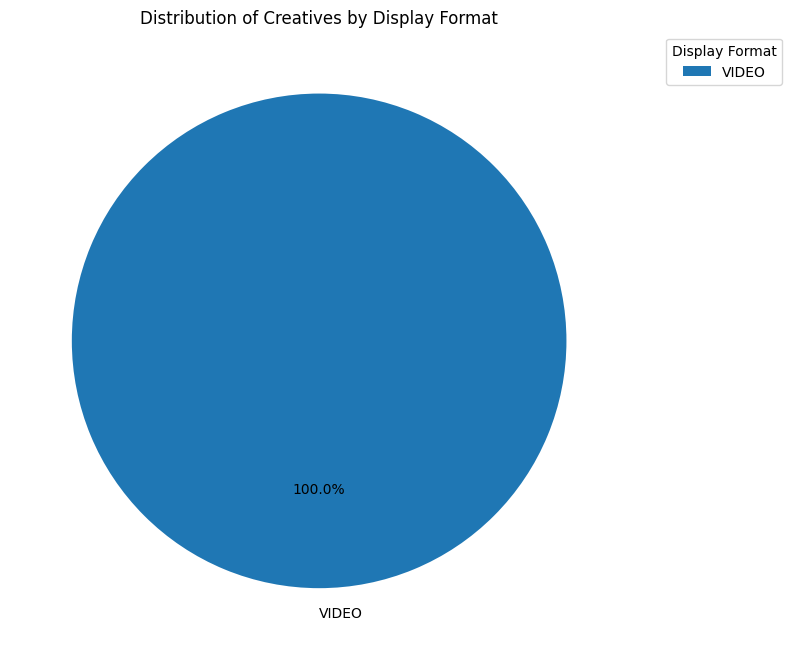

In [377]:
# 1. Group only by display_format
display_format_counts = df_performing_sorted['display_format'].value_counts()

# 2. Plot pie chart
plt.figure(figsize=(8,8))
display_format_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, counterclock=False)

plt.title('Distribution of Creatives by Display Format')
plt.ylabel('')  # Hide y-axis label
plt.legend(title='Display Format', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Duration and Collation Count

C:\Users\d-beg\AppData\Local\Temp\ipykernel_32504\2642670113.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot_table_collation = df_performing_sorted.groupby(['duration_bin', 'collation_count']).size().unstack(fill_value=0)


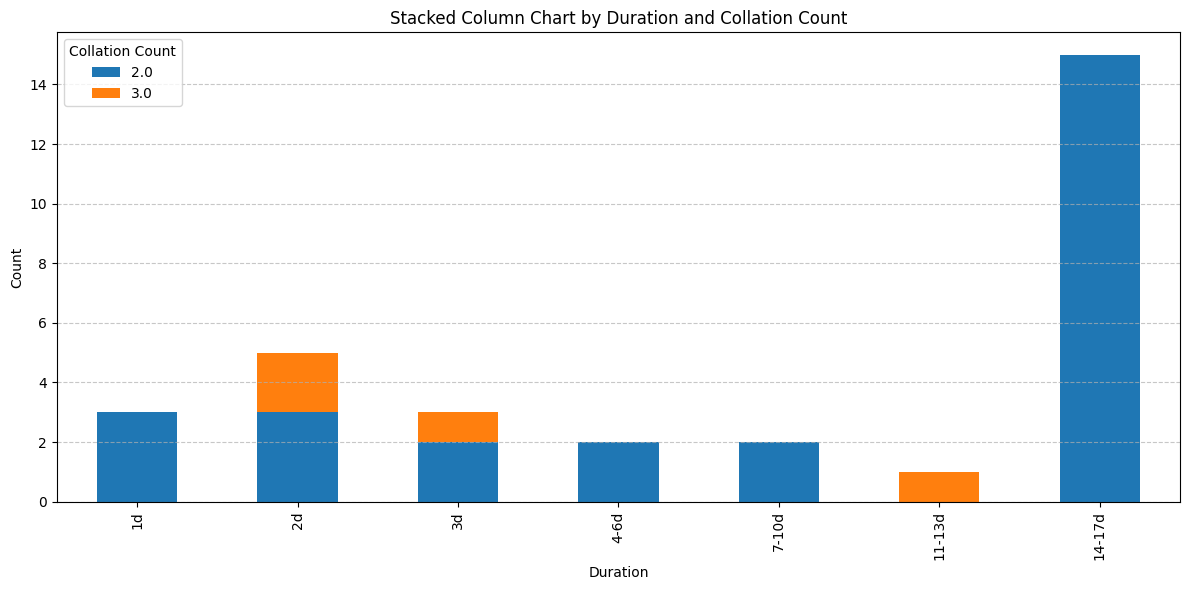

In [379]:
bins = sorted(list(df_performing_sorted.duration.unique()))
labels = ['1d', '2d', '3d', '4-6d', '7-10d', '11-13d', '14-17d']

# 2. Cut duration into bins
df_performing_sorted['duration_bin'] = pd.cut(df_performing_sorted['duration'], bins=bins, labels=labels, right=False)

# 3. Group by bin and publisher_platform
pivot_table_collation = df_performing_sorted.groupby(['duration_bin', 'collation_count']).size().unstack(fill_value=0)

# 4. Plot
pivot_table_collation.plot(kind='bar', stacked=True, figsize=(12,6))

plt.xlabel('Duration')
plt.ylabel('Count')
plt.title('Stacked Column Chart by Duration and Collation Count')
plt.legend(title='Collation Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Analysis of the Video content

In [380]:
# Leaving only distinct creatives
df_performing_sorted_drop = df_performing_sorted.drop_duplicates(subset=['collation_id'])
df_performing_sorted_drop = df_performing_sorted.reset_index(drop = True)

videos = list(df_performing_sorted_drop.video_hd_url.unique())
print(*videos, sep = '\n\n')

https://z-p3-video.fdac3-2.fna.fbcdn.net/v/t42.1790-2/489773670_678418234655803_2710745979953401137_n.?_nc_cat=104&ccb=1-7&_nc_sid=c53f8f&_nc_ohc=l7TvqenfF5EQ7kNvwEiuOKR&_nc_oc=Adkh43cTMxb5wbu7963Gkcv43JkRHA38od-oe7lNfrU1kKjXCE8FNU74rFkZrenYME0&_nc_zt=28&_nc_ht=z-p3-video.fdac3-2.fna&_nc_gid=BCLujpMjCSm6hGfvWatsXw&oh=00_AfF3szqrWq-coda3kljVD9QIdSLrZ1kZu-GYlmPES9YLRQ&oe=6812C354

https://video.fhan18-1.fna.fbcdn.net/v/t42.1790-2/490942636_1033228628695725_2126137497312183860_n.?_nc_cat=102&ccb=1-7&_nc_sid=c53f8f&_nc_ohc=B8zLvZgvF6kQ7kNvwGh2XZH&_nc_oc=AdmPXm2jOJO3zpsCVSYzU_FsjXjlk5x-dmMF3k9YQ4heseut7cPReY91Nas8gi2OLA0&_nc_zt=28&_nc_ht=video.fhan18-1.fna&_nc_gid=aLp13y7cjsjLTPT39DGWFA&oh=00_AfH4tf2GDdvumju9RvIX0qW65PVxr7dG2GWBwpoSowlqAA&oe=6812D3DA

https://video.ftun2-2.fna.fbcdn.net/v/t42.1790-2/490453866_682239014349245_647945285457981597_n.?_nc_cat=100&ccb=1-7&_nc_sid=c53f8f&_nc_ohc=-M6PZXKa1qcQ7kNvwFLfjy2&_nc_oc=AdkvA7c5yhZIBEYFMf86NDzZsQwpwm0sYW_SyVkx6L7-_q2h8w_YDCwARAVhLRST69c&_nc_


temp/Video analysis.csv includes factors that videos may have included, the csv was done mannually

In [381]:
temp = pd.read_csv('Video analysis.csv')

merged_df = pd.merge(df_performing_sorted_drop, temp, left_index=True, right_index=True)
merged_df = merged_df.drop('ad_archive_id_y', axis = 1)

In [382]:
temp.head(3)

,ad_archive_id,Subtitles,Public speaking,Plan,Several scenes,Speaking to a viewer,A person doing something usual
0,6.784180e+14,1,1,1,1,0,0
1,6.822390e+14,1,1,1,1,0,0
2,6.853390e+14,1,1,1,1,0,0


Visualizing the distribution of factors that may have influenced the videos performance

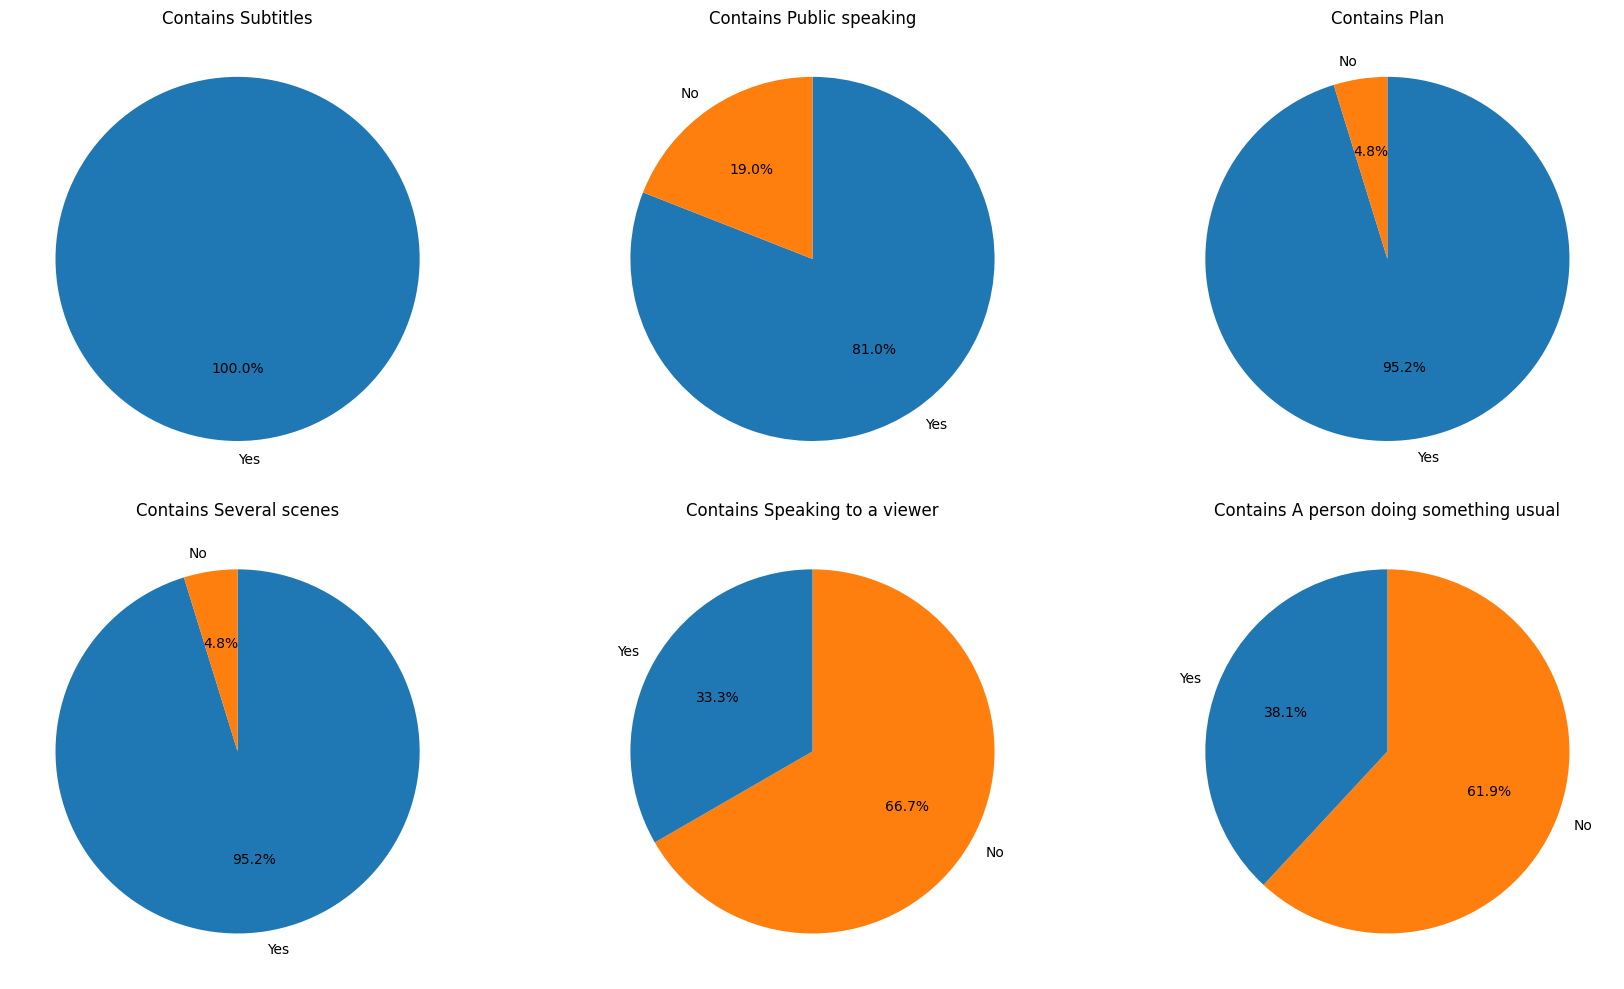

In [384]:
# List of columns to plot
columns_to_plot = [
    'Subtitles',
    'Public speaking',
    'Plan',
    'Several scenes',
    'Speaking to a viewer',
    'A person doing something usual'
]

color_mapping = {
    'Yes': '#1f77b4',    # Blue
    'No': '#ff7f0e'      # Orange
}

# Create pie charts
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 rows, 3 columns grid
axes = axes.flatten()

# Loop through each column and plot
for i, col in enumerate(columns_to_plot):
    value_counts = merged_df[col].value_counts()

    # Map 1 -> 'Yes', 0 -> 'No'
    labels = ['Yes' if val == 1 else 'No' for val in value_counts.index]
    colors = [color_mapping[label] for label in labels]
    
    axes[i].pie(
        value_counts,
        labels=labels,
        colors=colors,
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False
    )
    axes[i].set_title(f'Contains {col}')

# Adjust layout
plt.tight_layout()
plt.show()
